In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## critically dumped harmonic oscillator

$ \ddot{v} = -2a\dot{v} - a^2 v $

run the simulations using Eular's integration method
- $dt = 0.01$

to use Eular's method, transform as

- $\dot{u} = -2au-a^2v$
- $\dot{v} = u$

where $a = 0.5$, $v(0) = 0.3$, $\dot{v}(0) = u(0) = 0.5$ 

In [39]:
a = 0.5
dt = 0.01
T = 20
u = np.zeros(int(T/dt))
v = np.zeros(int(T/dt))
u[0] = 0.5
v[0] = 0.3
for i in range(1, int(T/dt)):
    u[i] = u[i-1] + dt*(-2*a*u[i-1]-(a**2)*v[i-1])
    v[i] = v[i-1] + dt*u[i-1]

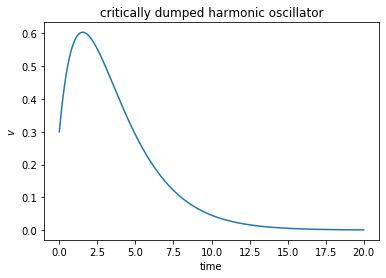

In [40]:
plt.plot(np.arange(0, T, dt), v[:])

plt.xlabel('time')
plt.ylabel('$v$')
plt.title('critically dumped harmonic oscillator')
plt.show()

## Analytical Solution

$v(t) = (c_1+c_2t)e^{-at}$

where $c_1 = 0.3$, $c_2=0.65$ 


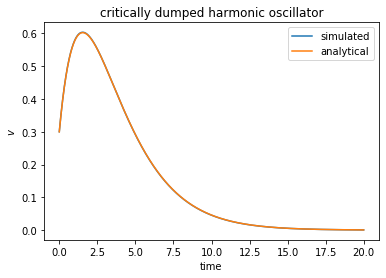

In [41]:
time = np.arange(0, T, dt)
v_ = (0.3+0.65*time)*np.exp(-a*time)
plt.plot(np.arange(0, T, dt), v, label='simulated')
plt.plot(time, v_, label='analytical')
plt.xlabel('time')
plt.ylabel('$v$')
plt.title('critically dumped harmonic oscillator')
plt.legend()
plt.show()

## Neural-mass model

critically dumped narmonic oscillator + coupling effect

- $\ddot{E}_i = aA[C_2 f(C_1 P_i) + p(t) + g\sum_{j=1}^N A_{ij}f(E_j-I_j)]-2a\dot{E}_i - a^2E_i $
- $\ddot{I}_i = bBC_4 f(C_3 P_i) - 2b\dot{I}_i - b^2I_i$
- $\ddot{P_i} = aAf(E_i - I_i) - 2a\dot{P}_i - a^2P_i $

where 

- $p(t) = p_0 + \xi(t)$
- $f(v) = \frac{2e_0}{1+e^{r(v_0-v)}} $

parameters are as follows.

- $A=3.25$
- $B=22$
- $a=100$
- $b=50$
- $C_1 = C=135 $
- $C_2 = 0.8C$
- $ C_3 = 0.25C$
- $C_4 = 0.25C$
- $v_0 = 6$
- $e_0 = 3.0$
- $r = 0.56$
- $\xi$: Gaussian white noise
- $p_0 = 200$

In [88]:
A = 3.25
B = 22
a = 100
b = 50
C_1 = 135
C_2 = 0.8*C_1
C_3 = 0.25*C_1
C_4 = 0.25*C_1
v_0 = 6
e_0 = 3.0
r = 0.56
p_0 = 200
macaque_cortex = np.load('macaque_cortex.npy')
N = np.shape(macaque_cortex)[0]

def sigmoid(v):
    return 2*e_0/(1+np.exp(r*(v_0-v)))

def perturbation(t, N):
    if t < 500:
        return p_0 + np.random.normal(0, 0.1*p_0, N)
    else:
        return p_0 + np.random.normal(0, 0.02*p_0, N)

E = np.zeros([int(T/dt), N])
I = np.zeros([int(T/dt), N])
P = np.zeros([int(T/dt), N])
E_u = np.zeros([int(T/dt), N])
I_u = np.zeros([int(T/dt), N])
P_u = np.zeros([int(T/dt), N])
E[0] = np.random.rand(N)
I[0] = np.random.rand(N)
P[0] = np.random.rand(N)
E_u[0] = np.random.rand(N)
I_u[0] = np.random.rand(N)
P_u[0] = np.random.rand(N)
g = 0.53
for t in range(1, int(T/dt)):
    if t < 500:
        g = 0.0
    E_u[t] = E_u[t-1] + dt*(a*A*(C_2*sigmoid(C_1*P[t-1])+perturbation(t, N) + g*np.dot(macaque_cortex, sigmoid(E[t-1]-I[t-1]))) - 2*a*E_u[t-1] - (a**2)*E[t-1])
    I_u[t] = I_u[t-1] + dt*(b*B*C_4*sigmoid(C_3*P[t-1]) - 2*b*I_u[t-1] - (b**2)*I[t-1])
    P_u[t] = P_u[t-1] + dt*(a*A*sigmoid(E[t-1]-I[t-1]) - 2*a*P_u[t-1] - (a**2)*P[t-1])
    E[t] = E[t-1] + dt*E_u[t-1]
    I[t] = I[t-1] + dt*I_u[t-1]
    P[t] = P[t-1] + dt*P_u[t-1]

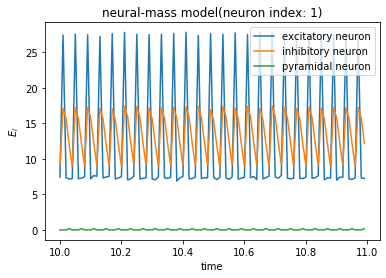

In [89]:
plt.plot(np.arange(0, T, dt)[1000:1100], E[:, 1][1000:1100], label='excitatory neuron')
plt.plot(np.arange(0, T, dt)[1000:1100], I[:, 1][1000:1100], label='inhibitory neuron')
plt.plot(np.arange(0, T, dt)[1000:1100], P[:, 1][1000:1100], label='pyramidal neuron')

plt.xlabel('time')
plt.ylabel('$E_i$')
plt.title('neural-mass model(neuron index: 1)')
plt.legend()
plt.show()

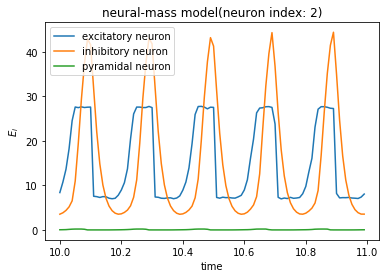

In [93]:
plt.plot(np.arange(0, T, dt)[1000:1100], E[:, 2][1000:1100], label='excitatory neuron')
plt.plot(np.arange(0, T, dt)[1000:1100], I[:, 2][1000:1100], label='inhibitory neuron')
plt.plot(np.arange(0, T, dt)[1000:1100], P[:, 2][1000:1100], label='pyramidal neuron')

plt.xlabel('time')
plt.ylabel('$E_i$')
plt.title('neural-mass model(neuron index: 2)')
plt.legend()
plt.savefig('neural_mass_model.png', dpi=100)
plt.show()

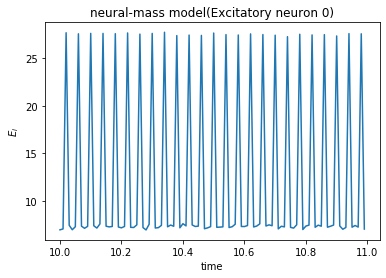

In [91]:
plt.plot(np.arange(0, T, dt)[1000:1100], E[:, 0][1000:1100])
plt.xlabel('time')
plt.ylabel('$E_i$')
plt.title('neural-mass model(Excitatory neuron 0)')
plt.show()

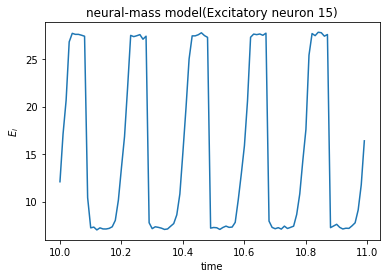

In [78]:
plt.plot(np.arange(0, T, dt)[1000:1100], E[:, 15][1000:1100])
plt.xlabel('time')
plt.ylabel('$E_i$')
plt.title('neural-mass model(Excitatory neuron 15)')
plt.show()

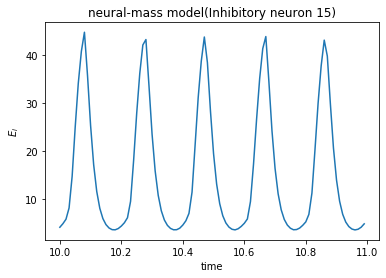

In [79]:
plt.plot(np.arange(0, T, dt)[1000:1100], I[:, 15][1000:1100])
plt.xlabel('time')
plt.ylabel('$E_i$')
plt.title('neural-mass model(Inhibitory neuron 15)')
plt.show()

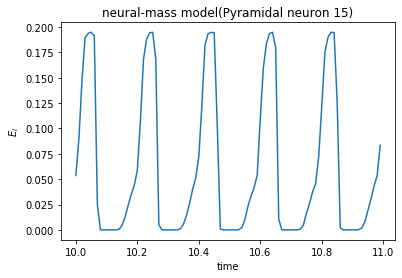

In [80]:
plt.plot(np.arange(0, T, dt)[1000:1100], P[:, 15][1000:1100])
plt.xlabel('time')
plt.ylabel('$E_i$')
plt.title('neural-mass model(Pyramidal neuron 15)')
plt.show()